# 1. Introduction and System Requirements

## 1.1 Problem Statement

The biology research team faces a complex image classification challenge requiring automated identification of cell types from microscopy images. This represents a fundamental systems challenge with the following characteristics:

- **Dataset**: Thousands of microscopy images
- **Labels**: Partially labeled dataset (semi-supervised learning scenario)
- **Domain complexity**: Cell morphology varies significantly within and between cell types
- **Computational resources**: Access to HPC cluster with GPUs
- **User expertise**: Strong domain knowledge in biology and life sciences, limited programming experience provides opportunity to develop and integrate pathways for deeper technical learning

Deep learning approaches are particularly well-suited for microscopy image classification because they can:
1. Learn hierarchical features directly from raw image data
2. Capture complex morphological patterns difficult to define manually
3. Achieve state-of-the-art performance on similar biomedical imaging tasks
4. Leverage transfer learning to address partially labeled data challenges

The system design must address not only the technical aspects of implementing deep learning models but also create an accessible framework that empowers domain experts to leverage their biological knowledge throughout the development process.

Below is a visualization of the proposed workflow connecting microscopy imaging to automated cell classification:

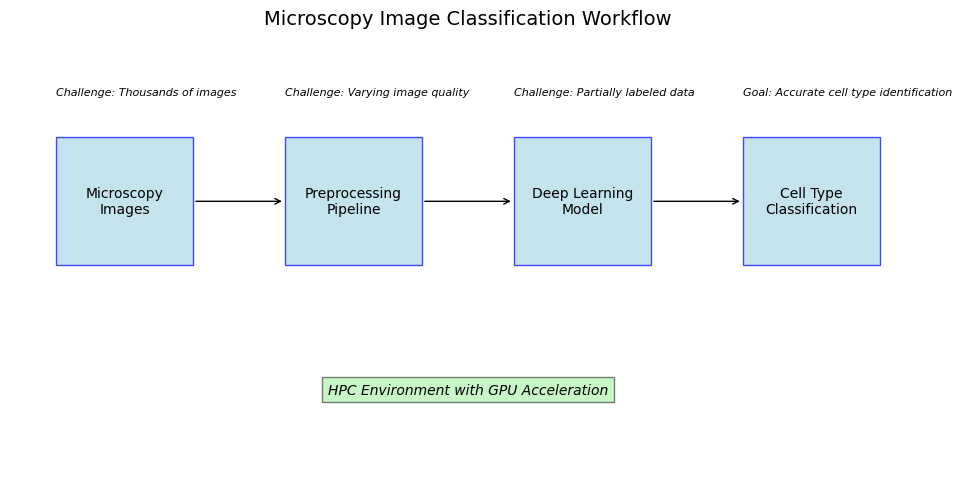

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# setup the figure
fig, ax = plt.subplots(figsize=(10, 5))

# component boxes with positions
components = [
    {"name": "Microscopy\nImages", "position": [0.05, 0.5, 0.15, 0.3]},
    {"name": "Preprocessing\nPipeline", "position": [0.3, 0.5, 0.15, 0.3]},
    {"name": "Deep Learning\nModel", "position": [0.55, 0.5, 0.15, 0.3]},
    {"name": "Cell Type\nClassification", "position": [0.8, 0.5, 0.15, 0.3]}
]

# draw the boxes
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', facecolor='lightblue', alpha=0.7)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=10)

# connect with arrows
arrows = [
    {"start": [0.2, 0.65], "end": [0.3, 0.65]},  # first arrow
    {"start": [0.45, 0.65], "end": [0.55, 0.65]},  # middle arrow
    {"start": [0.7, 0.65], "end": [0.8, 0.65]},  # last arow
]

# draw arrows
for arrow in arrows:
    ax.annotate(
        '', xy=arrow["end"], xytext=arrow["start"],
        arrowprops=dict(arrowstyle='->', color='black')
    )

# add challenge notes
plt.text(0.05, 0.9, "Challenge: Thousands of images", fontsize=8, style='italic')
plt.text(0.3, 0.9, "Challenge: Varying image quality", fontsize=8, style='italic')
plt.text(0.55, 0.9, "Challenge: Partially labeled data", fontsize=8, style='italic')
plt.text(0.8, 0.9, "Goal: Accurate cell type identification", fontsize=8, style='italic')

# add hpc label at bottom
plt.text(0.5, 0.2, "HPC Environment with GPU Acceleration", fontsize=10, 
         style='italic', bbox=dict(facecolor='lightgreen', alpha=0.5), ha='center')

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# title
plt.title('Microscopy Image Classification Workflow', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

## 1.2 Requirements Analysis

### Functional Requirements
- Process microscopy images for cell type classification
- Accommodate partially labeled dataset in the learning approach
- Provide an intuitive interface that bridges biology expertise with deep learning capabilities
- Enable researchers to translate their domain knowledge into model development
- Support the classification of various cell types from microscopy images

### Performance Considerations
- Classification accuracy suitable for research-grade analysis
- Processing efficiency utilizing available HPC resources
- Scalability to handle the thousands of available images
- Effective utilization of GPU resources for model training and inference

### Researcher Experience Considerations
- Domain-centered interface that speaks the language of biology research
- Tools that empower biologists to directly apply their specialized knowledge
- Knowledge transfer mechanisms aligned with research methodologies
- Seamless integration into existing microscopy research workflows

### Integration Considerations
- Compatibility with the available HPC cluster environment
- Effective utilization of GPU resources
- Data management appropriate for the image dataset scale
- Support for reproducible research practices
- Appropriate version control for models and experiments

## 1.3 System Constraints and Considerations

### Technical Constraints
- **Partially Labeled Dataset**: The system must work with the mix of labeled and unlabeled microscopy images
- **HPC and GPU Resources**: Design must effectively utilize the available HPC cluster with GPUs
- **Image Volume**: System needs to efficiently process thousands of microscopy images
- **Computational Requirements**: Deep learning for image classification typically requires significant computational resources

### Design Considerations for Accessibility
- **Domain-Appropriate Interface**: Create interfaces that prioritize biological concepts over technical implementation
- **Technical Abstraction**: Abstract complex programming concepts while maintaining system capabilities
- **Intuitive Workflows**: Design processes that align with biological research methodologies
- **Balanced Autonomy**: Allow researchers to focus on biological analysis while automating technical aspects

### Reproducibility Considerations
- **Consistent Results**: Ensure classification outcomes are reproducible across multiple runs
- **Parameter Tracking**: Record model configurations and processing steps
- **Environment Management**: Account for dependencies and configurations in the HPC environment
- **Experiment History**: Maintain records of different approaches and their outcomes

### Research Workflow Considerations
- **Integration with Existing Processes**: Consider how the system fits into current microscopy research activities
- **Data Management**: Address the handling of thousands of images through the classification pipeline
- **Result Interpretation**: Provide ways for biologists to understand and interpret model outputs
- **Knowledge Application**: Enable researchers to apply their domain expertise to improve classifications

# 2. Image Processing Architecture

## 2.1 Data Organization Framework

The architecture requires a structured organization framework to efficiently manage thousands of microscopy images while distinguishing between labeled and unlabeled data. This organization lays the foundation for subsequent processing and model development.

### Core Organization Principles

- **Separation of Concerns**: Maintain clear distinction between raw images, processed images, and derived features
- **Labeled/Unlabeled Distinction**: Organize data to facilitate both supervised and semi-supervised learning approaches
- **Metadata Association**: Connect images with relevant experimental context and cell type labels
- **Versioning Support**: Enable tracking of image processing iterations and experimental variants
- **Scalability**: Accommodate growth from thousands to potentially tens of thousands of images

### Proposed Organizational Structure

The organization framework follows a hierarchical approach with progressive refinement:

1. **Source Image Repository**: Original microscopy images preserved in unmodified form
2. **Processing Staging Area**: Working space for preprocessing operations
3. **Feature Repository**: Extracted features and representations for model development
4. **Model Training Sets**: Curated collections of processed images for specific experiments
5. **Results Archive**: Classification outputs with associated model metadata

This structure enables researchers to maintain data provenance while facilitating efficient access patterns for the HPC environment.

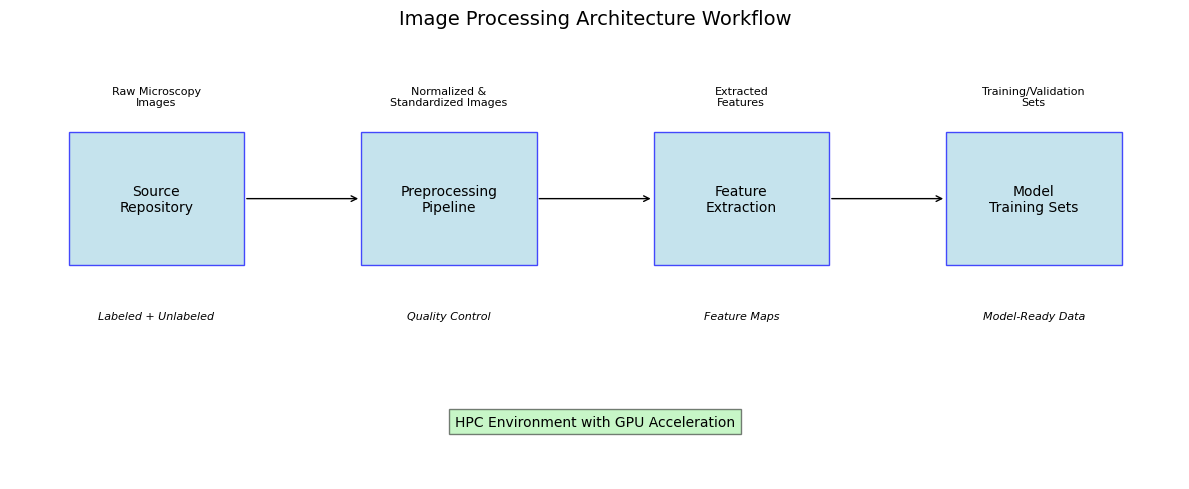

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# setup figure
fig, ax = plt.subplots(figsize=(12, 5))

# main process boxes
components = [
    {"name": "Source\nRepository", "position": [0.05, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Preprocessing\nPipeline", "position": [0.3, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Feature\nExtraction", "position": [0.55, 0.4, 0.15, 0.25], "color": "lightblue"},
    {"name": "Model\nTraining Sets", "position": [0.8, 0.4, 0.15, 0.25], "color": "lightblue"}
]

# draw the boxes
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='blue', 
                            facecolor=comp["color"], alpha=0.7)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=10)

# connect with arrows
arrows = [
    {"start": [0.2, 0.525], "end": [0.3, 0.525]},
    {"start": [0.45, 0.525], "end": [0.55, 0.525]},
    {"start": [0.7, 0.525], "end": [0.8, 0.525]},
]

# draw arrows
for arrow in arrows:
    ax.annotate('', xy=arrow["end"], xytext=arrow["start"],
                arrowprops=dict(arrowstyle='->', color='black'))

# Calculate center positions based on component boxes
for i, comp in enumerate(components):
    x, y, w, h = comp["position"]
    center_x = x + w/2
    
    # add data labels above - aligned with center of each box
    if i == 0:
        ax.text(center_x, 0.7, "Raw Microscopy\nImages", fontsize=8, ha='center')
    elif i == 1:
        ax.text(center_x, 0.7, "Normalized &\nStandardized Images", fontsize=8, ha='center')
    elif i == 2:
        ax.text(center_x, 0.7, "Extracted\nFeatures", fontsize=8, ha='center')
    else:
        ax.text(center_x, 0.7, "Training/Validation\nSets", fontsize=8, ha='center')
    
    # add data flow labels below - aligned with center of each box
    if i == 0:
        ax.text(center_x, 0.3, "Labeled + Unlabeled", fontsize=8, ha='center', style='italic')
    elif i == 1:
        ax.text(center_x, 0.3, "Quality Control", fontsize=8, ha='center', style='italic')
    elif i == 2:
        ax.text(center_x, 0.3, "Feature Maps", fontsize=8, ha='center', style='italic')
    else:
        ax.text(center_x, 0.3, "Model-Ready Data", fontsize=8, ha='center', style='italic')

# add hpc environment indication
plt.text(0.5, 0.1, "HPC Environment with GPU Acceleration", fontsize=10, 
         bbox=dict(facecolor='lightgreen', alpha=0.5), ha='center')

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 0.8)
ax.axis('off')
plt.title('Image Processing Architecture Workflow', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## 2.2 Preprocessing Pipeline Design

The preprocessing pipeline transforms raw microscopy images into standardized inputs suitable for deep learning models. For microscopy data, preprocessing is particularly important due to variations in imaging conditions, magnification, staining, and acquisition parameters.

### Pipeline Components

- **Quality Assessment**: Automated detection of common microscopy artifacts, blur, or contamination
- **Normalization**: Standardizing pixel intensity distributions to account for lighting and exposure variations
- **Registration**: Aligning images to consistent orientations and positions
- **Segmentation**: Isolating regions of interest such as individual cells from background
- **Augmentation**: Generating additional training examples through controlled variations

### Computational Considerations

The preprocessing pipeline must balance computational efficiency with quality:

- **Batch Processing**: Design pipeline to process groups of images in parallel on HPC resources
- **GPU Acceleration**: Utilize GPU capabilities for compute-intensive operations like segmentation
- **Caching Strategy**: Implement intermediate result storage to avoid redundant computation
- **Scalable Workflow**: Enable processing of image subsets during development and full dataset in production

### Accessibility Approach

Making preprocessing accessible to researchers with domain knowledge:

- **Parameter Presets**: Provide validated settings for common microscopy image types
- **Visual Feedback**: Incorporate visualization of preprocessing effects for quality assessment
- **Interactive Refinement**: Enable adjustment of preprocessing parameters with real-time feedback
- **Configurable Workflows**: Allow researchers to include or exclude preprocessing steps based on their data characteristics

## 2.3 Feature Extraction Strategy

Feature extraction transforms preprocessed images into representations that capture relevant cellular characteristics for classification. Effective feature extraction is critical for microscopy image analysis, where subtle morphological differences often determine cell type.

### Deep Learning Approaches

- **Convolutional Neural Networks**: Leverage hierarchical feature learning for automatic extraction of relevant visual patterns
- **Transfer Learning**: Utilize pre-trained networks to extract general image features, reducing computational requirements and training data needs
- **Self-Supervised Learning**: Extract features from unlabeled images by learning to solve pretext tasks

### Domain Knowledge Integration

- **Attention Mechanisms**: Direct the model to focus on biologically relevant regions
- **Guided Feature Emphasis**: Incorporate domain knowledge to prioritize cell-specific characteristics
- **Feature Validation**: Provide visualization tools for biologists to inspect extracted features for biological relevance

### Computational Optimization

- **Progressive Resolution**: Process images at multiple scales to balance detail and computation
- **Dimensionality Reduction**: Apply techniques to focus on most discriminative features
- **Distributed Processing**: Parallelize feature extraction across HPC nodes for efficiency

### Hybrid Extraction Framework

A hybrid approach combines automatic feature extraction with domain expertise:

1. **Base Feature Extraction**: Apply deep learning for initial feature identification
2. **Domain Feedback Loop**: Allow researchers to review and guide feature importance
3. **Iterative Refinement**: Adjust feature extraction based on biological insights
4. **Explainable Outputs**: Generate visualizations of extracted features in biologically meaningful terms

# 3. Model Development Framework

## 3.1 Transfer Learning Strategy

Transfer learning provides an effective approach for microscopy image classification, particularly valuable given the partially labeled dataset and domain-specific nature of cell type identification.

### Key Transfer Learning Components

- **Pre-trained Feature Extractors**: Utilize neural networks pre-trained on large image datasets as starting points
- **Domain Adaptation Layer**: Add customizable layers that adapt general visual features to cell-specific characteristics
- **Fine-tuning Strategy**: Progressively adjust pre-trained weights to capture microscopy-specific patterns
- **Feature Preservation**: Maintain early-layer features that capture universal visual elements while specializing later layers

### Benefits for Partially Labeled Data

- **Reduced Annotation Requirements**: Transfer learning significantly decreases the quantity of labeled examples needed
- **Feature Generalization**: Pre-trained networks provide robust feature extraction even for previously unseen cell types
- **Knowledge Transfer**: General image patterns serve as a foundation for specialized cellular feature identification

### Domain-Expertise Integration

- **Selective Fine-tuning**: Enable researchers to guide which network layers should be specialized for cell morphology
- **Feature Visualization**: Provide tools to visualize what features the model is learning, allowing biologists to validate biological relevance
- **Iterative Refinement**: Support cycles of training, review, and adjustment focused on domain-specific characteristics

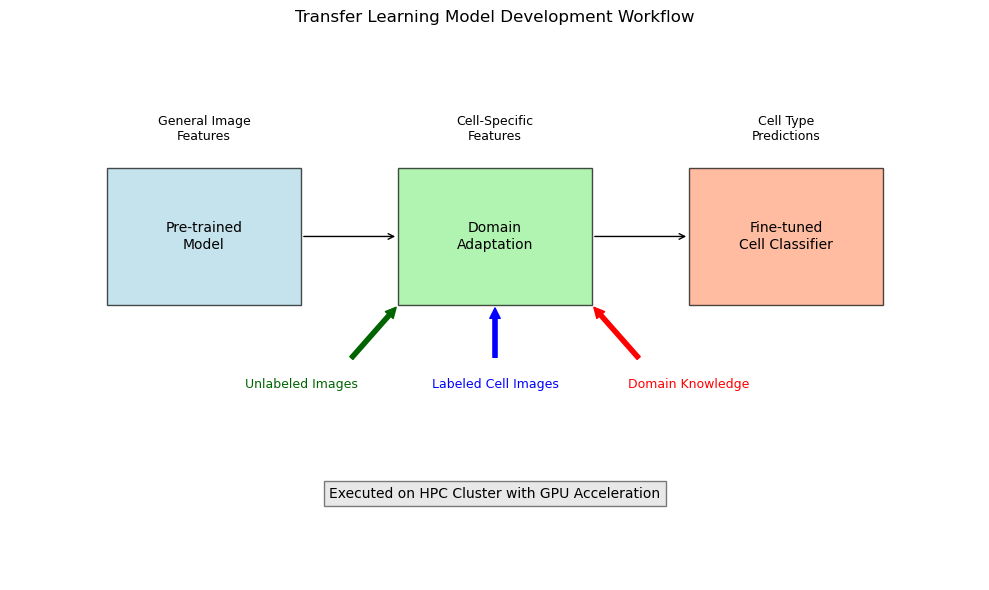

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# define the components
components = [
    {"name": "Pre-trained\nModel", "position": [0.1, 0.5, 0.2, 0.25], "color": "lightblue"},
    {"name": "Domain\nAdaptation", "position": [0.4, 0.5, 0.2, 0.25], "color": "lightgreen"},
    {"name": "Fine-tuned\nCell Classifier", "position": [0.7, 0.5, 0.2, 0.25], "color": "lightsalmon"}
]

# draw boxes
for comp in components:
    x, y, w, h = comp["position"]
    rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='black', 
                           facecolor=comp["color"], alpha=0.7)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, comp["name"], ha='center', va='center', fontsize=10)

# add arrows between components
arrows = [
    {"start": [0.3, 0.625], "end": [0.4, 0.625]},
    {"start": [0.6, 0.625], "end": [0.7, 0.625]},
]

for arrow in arrows:
    ax.annotate('', xy=arrow["end"], xytext=arrow["start"],
               arrowprops=dict(arrowstyle='->', color='black'))

# add data flow annotations
ax.text(0.2, 0.8, "General Image\nFeatures", fontsize=9, ha='center')
ax.text(0.5, 0.8, "Cell-Specific\nFeatures", fontsize=9, ha='center')
ax.text(0.8, 0.8, "Cell Type\nPredictions", fontsize=9, ha='center')

# add input data arrows
labeled_data = patches.FancyArrowPatch((0.5, 0.4), (0.5, 0.5), 
                                     mutation_scale=15, color='blue')
ax.add_patch(labeled_data)
ax.text(0.5, 0.35, "Labeled Cell Images", color='blue', fontsize=9, ha='center')

unlabeled_data = patches.FancyArrowPatch((0.35, 0.4), (0.4, 0.5), 
                                       mutation_scale=15, color='darkgreen')
ax.add_patch(unlabeled_data)
ax.text(0.3, 0.35, "Unlabeled Images", color='darkgreen', fontsize=9, ha='center')

domain_knowledge = patches.FancyArrowPatch((0.65, 0.4), (0.6, 0.5), 
                                         mutation_scale=15, color='red')
ax.add_patch(domain_knowledge)
ax.text(0.7, 0.35, "Domain Knowledge", color='red', fontsize=9, ha='center')

# add hpc note
plt.text(0.5, 0.15, "Executed on HPC Cluster with GPU Acceleration", fontsize=10, 
         bbox=dict(facecolor='lightgray', alpha=0.5), ha='center')

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.title('Transfer Learning Model Development Workflow', fontsize=12)
plt.tight_layout()
plt.show()

## 3.2 Semi-Supervised Learning Approach

Semi-supervised learning addresses the partially labeled dataset challenge by incorporating both labeled and unlabeled microscopy images into the model development process.

### Core Strategies

- **Pseudo-Labeling**: Train initial models on labeled data to generate provisional labels for unlabeled images
- **Consistency Regularization**: Enforce consistent predictions when applying different transformations to unlabeled images
- **Representation Learning**: Learn image representations using both labeled and unlabeled data
- **Active Learning**: Prioritize which unlabeled images would be most valuable to have experts annotate

### Domain Knowledge Integration

- **Confidence Thresholding**: Allow domain experts to set thresholds for accepting pseudo-labels based on biological plausibility
- **Guided Augmentation**: Apply transformations that reflect natural variations in microscopy imaging
- **Morphological Constraints**: Incorporate biological constraints on cell features into the learning process
- **Iterative Validation**: Enable researchers to review and refine model predictions on unlabeled data

### Computational Implementation

- **Progressive Training**: Start with labeled data before incorporating unlabeled examples
- **Distributed Batch Processing**: Process large volumes of unlabeled data across HPC nodes
- **Asynchronous Updates**: Allow model refinement with newly labeled data without full retraining
- **Resource-Aware Scheduling**: Prioritize computational resources based on training stage and dataset size

## 3.3 Training Workflow Design

The training workflow bridges model architecture with practical implementation, creating an accessible framework that effectively utilizes HPC resources while enabling domain experts to guide the process.

### HPC Resource Utilization

- **Job Scheduling**: Configure training jobs appropriate for the HPC environment
- **Parallel Processing**: Distribute model training across available GPUs
- **Checkpointing**: Implement regular state saving to recover from potential interruptions
- **Resource Monitoring**: Track GPU utilization and memory consumption during training

### Accessible Training Process

- **Experiment Templates**: Provide configurable templates that capture common training scenarios
- **Parameter Configuration**: Design intuitive interfaces for adjusting key model parameters
- **Visual Progress Tracking**: Display training progress through intuitive visualizations
- **Domain-Specific Controls**: Allow adjustment of training focus based on cell types of interest

### Experimental Iteration

- **Version Control**: Track model versions and associated training parameters
- **Experiment Comparison**: Enable side-by-side comparison of different training approaches
- **Incremental Refinement**: Support building upon previous models rather than starting from scratch
- **Knowledge Capture**: Document insights gained through the iterative process

### Evaluation Framework

- **Cross-Validation**: Implement appropriate validation strategies for cell classification
- **Confusion Analysis**: Provide detailed analysis of classification errors between cell types
- **Uncertainty Quantification**: Assess model confidence for different cell categories
- **Domain-Relevant Metrics**: Focus evaluation on metrics that align with biological significance

# 4. HPC Integration Architecture

## 4.1 HPC Access Framework

The HPC Access Framework creates a bridge between researchers and computational resources through Jupyter notebooks, abstracting the complexity of HPC operations while maintaining full capability.

### Notebook-Based Job Management

- **Template-Based Submission**: Pre-configured notebook templates handle job preparation and submission
- **Widget Controls**: Interactive ipywidgets provide intuitive interfaces for specifying job parameters
- **Background Execution**: Complex HPC interaction code runs in hidden cells or imported modules
- **Status Monitoring**: Real-time job status updates displayed directly in notebooks

### Abstraction Architecture

- **Layered Design**: Clear separation between researcher-facing interfaces and HPC-facing code
- **Parameterized Workflows**: Common deep learning workflows packaged as parameterized functions
- **Configuration Management**: User selections translated automatically to appropriate HPC job specifications
- **Authentication Handling**: Credential management handled transparently within the notebook environment

### Researcher Experience

- **Domain-Focused Interface**: Researchers interact with biological concepts rather than technical details
- **Process Visualization**: Clear visual indicators of job status and progress
- **Error Handling**: Informative error messages with suggested resolutions
- **Knowledge Preservation**: Automatic documentation of computational processes for reproducibility

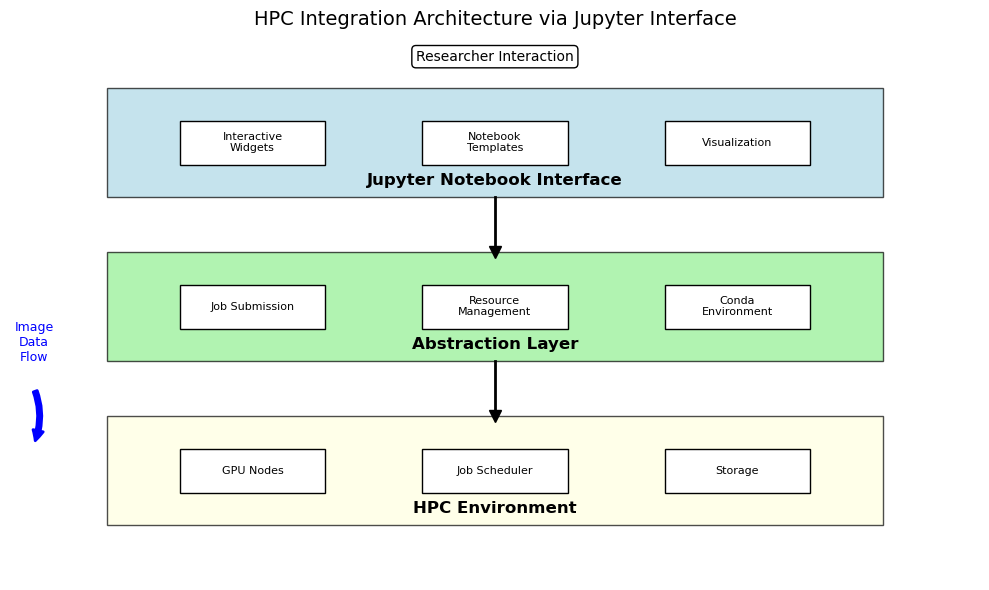

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# setup figure
fig, ax = plt.subplots(figsize=(10, 6))

# main layers
layers = [
    {"name": "Jupyter Notebook Interface", "y": 0.7, "color": "lightblue"},
    {"name": "Abstraction Layer", "y": 0.4, "color": "lightgreen"},
    {"name": "HPC Environment", "y": 0.1, "color": "lightyellow"}
]

# draw the layers
for layer in layers:
    rect = patches.Rectangle((0.1, layer["y"]), 0.8, 0.2, 
                           linewidth=1, edgecolor='black', 
                           facecolor=layer["color"], alpha=0.7)
    ax.add_patch(rect)
   
    ax.text(0.5, layer["y"]+0.03, layer["name"], 
           ha='center', va='center', fontsize=12, fontweight='bold')

# components in each layer
components = [
    # jupyter layer
    {"name": "Interactive\nWidgets", "x": 0.25, "y": 0.8, "w": 0.15, "h": 0.08},
    {"name": "Notebook\nTemplates", "x": 0.5, "y": 0.8, "w": 0.15, "h": 0.08},
    {"name": "Visualization", "x": 0.75, "y": 0.8, "w": 0.15, "h": 0.08},
    
    # abstraction layer
    {"name": "Job Submission", "x": 0.25, "y": 0.5, "w": 0.15, "h": 0.08},
    {"name": "Resource\nManagement", "x": 0.5, "y": 0.5, "w": 0.15, "h": 0.08},
    {"name": "Conda\nEnvironment", "x": 0.75, "y": 0.5, "w": 0.15, "h": 0.08},
    
    # hpc layer
    {"name": "GPU Nodes", "x": 0.25, "y": 0.2, "w": 0.15, "h": 0.08},
    {"name": "Job Scheduler", "x": 0.5, "y": 0.2, "w": 0.15, "h": 0.08},
    {"name": "Storage", "x": 0.75, "y": 0.2, "w": 0.15, "h": 0.08}
]

# draw component boxes
for comp in components:
    rect = patches.Rectangle((comp["x"] - comp["w"]/2, comp["y"] - comp["h"]/2), 
                           comp["w"], comp["h"], 
                           linewidth=1, edgecolor='black', 
                           facecolor='white', alpha=1.0)
    ax.add_patch(rect)
    ax.text(comp["x"], comp["y"], comp["name"], 
           ha='center', va='center', fontsize=8, fontweight='normal')

# connecting arrows

ax.plot([0.5, 0.5], [0.7, 0.6], 'k-', lw=2)
ax.plot(0.5, 0.6, 'kv', markersize=8)  

# arrow from Abstraction layer to HPC layer  
ax.plot([0.5, 0.5], [0.4, 0.3], 'k-', lw=2)
ax.plot(0.5, 0.3, 'kv', markersize=8) 

# data flow arrow
ax.text(0.025, 0.4, "Image\nData\nFlow", color='blue', fontsize=9, ha='center')
data_arrow = patches.FancyArrowPatch((0.025, 0.35), (0.025, 0.25), 
                                   connectionstyle="arc3,rad=-0.2",
                                   mutation_scale=15, color='blue', lw=2)
ax.add_patch(data_arrow)

# researcher labe
ax.text(0.5, 0.95, "Researcher Interaction", fontsize=10, ha='center',
      bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# cleanup
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('HPC Integration Architecture via Jupyter Interface', fontsize=14)
plt.tight_layout()
plt.show()

## 4.2 Resource Optimization Strategy

The resource optimization strategy focuses on efficient utilization of HPC GPU resources while maintaining accessibility through Jupyter notebook interfaces.

### GPU Resource Management

- **Adaptive Allocation**: Dynamic GPU assignment based on training stage and dataset size
- **Memory Optimization**: Efficient batch sizing to maximize GPU memory utilization without overflow
- **Queue Management**: Intelligent job scheduling that balances immediate needs with long-term resource availability
- **Resource Monitoring**: Real-time visualization of GPU utilization through notebook widgets

### Anaconda Environment Efficiency

- **Environment Caching**: Pre-built Conda environments optimized for deep learning frameworks
- **Dependency Optimization**: Minimal environment configurations to reduce startup time and resource overhead
- **Shared Libraries**: Common dependencies shared across environments to reduce storage requirements
- **Version Consistency**: Standardized package versions to ensure reproducibility across different compute nodes

### Data Movement Optimization

- **Staging Strategies**: Intelligent data pre-positioning to minimize transfer times during training
- **Batch Processing**: Coordinated data loading to reduce I/O bottlenecks during model training
- **Caching Mechanisms**: Temporary storage of preprocessed images to avoid redundant computation
- **Network Utilization**: Efficient data transfer patterns that consider HPC network topology

### Interactive Resource Control

- **Widget-Based Monitoring**: Real-time resource usage displays integrated within notebook interfaces
- **Priority Controls**: Interactive controls for adjusting job priority based on research urgency
- **Resource Reservation**: Notebook interfaces for reserving computational resources for planned experiments
- **Automated Scaling**: Background processes that adjust resource allocation based on workload patterns

## 4.3 Environment Management

Environment management through Anaconda ensures consistent, reproducible computational environments across the HPC cluster while minimizing technical complexity for researchers.

### Conda Environment Strategy

- **Pre-configured Environments**: Standardized environments containing deep learning frameworks optimized for microscopy image classification
- **Dependency Isolation**: Separate environments prevent conflicts between different software versions and requirements
- **Automated Activation**: Notebook templates automatically activate appropriate environments for specific tasks
- **Version Locking**: Environment files specify exact package versions to ensure consistent behavior across compute nodes

### Reproducibility Framework

- **Environment Snapshots**: Complete environment specifications captured and versioned with experimental results
- **Cross-Node Consistency**: Identical software environments maintained across all HPC compute nodes
- **Metadata Integration**: Environment information automatically embedded in notebook metadata
- **Rollback Capability**: Previous environment states can be restored when needed for result validation

### Maintenance and Updates

- **Centralized Management**: Environment updates managed centrally while preserving researcher workflow continuity
- **Compatibility Testing**: New package versions validated against existing workflows before deployment
- **Gradual Migration**: Researchers can transition to updated environments at appropriate points in their research cycle
- **Documentation Tracking**: Environment changes documented to maintain scientific reproducibility

### Integration with Workflow

- **Transparent Operation**: Environment management happens automatically without requiring researcher intervention
- **Notebook Integration**: Environment status and information displayed within notebook interfaces
- **Error Prevention**: Automatic environment validation prevents common dependency-related issues
- **Resource Optimization**: Environment configurations optimized for efficient resource utilization on HPC hardware

# 5. Reproducibility Framework

## 5.1 Experiment Tracking System

The experiment tracking system captures research activities and results through integrated notebook interfaces, ensuring comprehensive documentation without disrupting research workflows.

### Automated Capture Mechanisms

- **Parameter Logging**: Automatic recording of model parameters, preprocessing settings, and training configurations
- **Dataset Fingerprinting**: Unique identification of data subsets and transformations used in each experiment
- **Result Documentation**: Systematic capture of classification performance, model outputs, and validation metrics
- **Timeline Tracking**: Chronological record of experimental iterations and decision points

### Notebook-Integrated Tracking

- **Widget-Based Controls**: Interactive elements for researchers to annotate experiments and mark significant results
- **Background Logging**: Transparent capture of computational details through modular scripts
- **Visual Progress Records**: Embedded visualizations showing experimental progression and performance trends
- **Context Preservation**: Automatic capture of experimental context including research questions and hypotheses

### Research Workflow Integration

- **Seamless Operation**: Tracking occurs as natural part of notebook execution without additional researcher burden
- **Flexible Annotation**: Researchers can add domain-specific insights and interpretations at any stage
- **Comparative Analysis**: Built-in tools for comparing results across different experimental approaches
- **Knowledge Continuity**: Systematic preservation of research insights and decision rationale

## 5.2 Version Control Strategy

The version control strategy manages notebooks, data, and models through automated systems that operate transparently within the research workflow.

### Notebook Version Management

- **Automatic Snapshots**: Regular capture of notebook states at key experimental milestones
- **Change Tracking**: Documentation of modifications to analysis workflows and parameter adjustments
- **Branch Management**: Parallel development of different experimental approaches without interference
- **Rollback Capability**: Recovery of previous notebook states when needed for validation or comparison

### Data and Model Versioning

- **Data Lineage Tracking**: Complete record of data transformations and preprocessing steps
- **Model Checkpointing**: Systematic preservation of trained models at significant training stages
- **Dependency Linking**: Automatic association between specific data versions and corresponding model outputs
- **Incremental Storage**: Efficient storage of changes rather than complete data duplication

### Accessible Implementation

- **Background Operations**: Version control happens automatically through modular scripts without researcher intervention
- **Visual Indicators**: Notebook widgets display version status and provide access to historical states
- **Intuitive Navigation**: Researchers can explore different versions through familiar notebook interfaces
- **Conflict Prevention**: Automated coordination prevents data corruption during collaborative work

### Integration Architecture

- **Seamless Workflow**: Version control integrated into normal research activities without disrupting productivity
- **Metadata Synchronization**: Version information automatically embedded in experimental records
- **Cross-Reference Capability**: Easy navigation between related versions of data, models, and analysis notebooks
- **Recovery Mechanisms**: Robust backup and restoration procedures for critical research assets

## 5.3 Documentation and Knowledge Preservation

Documentation and knowledge preservation systems capture research methodology and insights as integral components of the notebook workflow.

### Integrated Documentation Framework

- **Contextual Annotation**: Researchers document decisions and insights directly within notebook cells as research progresses
- **Methodology Capture**: Automatic recording of analytical approaches and parameter reasoning
- **Knowledge Templates**: Pre-structured sections for capturing domain-specific insights about cell morphology and classification patterns
- **Collaborative Annotation**: Shared documentation spaces for team knowledge accumulation

### Research Continuity Systems

- **Decision Rationale**: Systematic capture of why specific approaches were chosen or modified
- **Insight Preservation**: Documentation of biological interpretations and domain expertise applied during analysis
- **Process Documentation**: Automatic generation of methodology summaries suitable for research contexts
- **Knowledge Transfer**: Structured formats for sharing expertise between team members

### Long-term Sustainability

- **Searchable Archives**: Organization of research knowledge for future reference and replication
- **Template Evolution**: Documentation frameworks that adapt based on accumulated research experience
- **Knowledge Validation**: Cross-referencing of documented insights with experimental results
- **Institutional Memory**: Preservation of research approaches and lessons learned for long-term team benefit

### Accessibility Integration

- **Natural Workflow**: Documentation occurs through familiar notebook interfaces without additional complexity
- **Progressive Detail**: Researchers can add documentation at appropriate levels of detail based on significance
- **Visual Organization**: Clear presentation of documented knowledge through notebook formatting and widgets
- **Automated Assistance**: Background systems that suggest documentation opportunities based on research activity patterns